In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import math
import random
import statsmodels.formula.api as smf

In [3]:
df_sales = pd.read_csv("data/advertising.csv")

In [12]:
results = smf.ols('Sales ~ TV + Radio + Newspaper', data = df_sales).fit()

In [8]:
df_sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        14:14:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
tv_radio = smf.ols('Sales ~ TV * Radio', data = df_sales).fit()

In [19]:
tv_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):          6.68e-146
Time:                        14:16:01   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
tv_radio.predict()

array([21.68638999, 10.6345456 ,  9.26121411, 17.63410793, 12.63691903,
        8.78989761, 10.8442801 , 12.17152653,  6.99471825, 11.2060639 ,
        8.59673149, 17.14235879,  9.12545963,  9.63700606, 18.89394694,
       21.985969  , 11.79767631, 25.37542032, 10.20495286, 14.07854249,
       18.29427139, 12.74746545,  7.68926729, 15.790725  ,  9.15673399,
       12.8726418 , 14.87449232, 16.1748409 , 19.61035135,  9.78782586,
       22.16770295, 11.54327673,  8.80854602, 18.17213205,  8.764166  ,
       13.7161902 , 25.81374174, 13.61213221,  9.59435306, 21.53237368,
       16.16811167, 17.51818498, 21.99388406, 12.83294356,  8.67223303,
       15.02469337,  9.71414378, 23.34725016, 15.44623275,  9.21618001,
       11.32903489,  9.99223433, 21.89156653, 20.73722364, 20.81940821,
       22.65065207,  7.92350625, 12.74713208, 23.56824031, 18.37946726,
        7.94610327, 25.09624277, 15.79841425, 12.86902351, 16.5860022 ,
        9.03379911,  8.90379313, 12.02403103, 19.17165511, 22.49

In [22]:
residuals = df_sales['Sales'] - tv_radio.predict()

In [24]:
predictions = tv_radio.predict()

In [25]:
residuals

0      0.413610
1     -0.234546
2      0.038786
3      0.865892
4      0.263081
         ...   
195   -0.140230
196    0.507539
197    0.612010
198   -0.820875
199   -0.200487
Name: Sales, Length: 200, dtype: float64

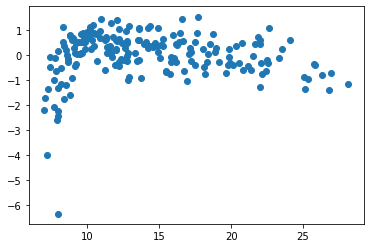

In [29]:
plt.scatter(predictions, residuals)